In [1]:
import numpy as np
import matplotlib.pyplot as mp
from PIL import Image, ImageDraw, ImageFilter
import cv2 as cv
import rawpy as raw
import rawpy.enhance
from skimage import exposure
from jupyterthemes import jtplot

In [2]:
jtplot.reset()
mp.style.use("seaborn")
mp.rcParams["axes.axisbelow"] = True
mp.rcParams["text.usetex"] = True
mp.rcParams["font.family"] = "serif"
mp.rcParams["figure.figsize"] = (16/2, 9/2)
mp.rcParams["figure.dpi"] = 100
mp.rcParams["text.latex.preamble"] = [r"\usepackage{physics}"]

In [95]:
raw_img = raw.imread('dsc_1674.nef')
img = raw_img.postprocess(use_camera_wb=True, 
                          output_bps=8)
img = cv.cvtColor(img.astype('uint8'), cv.COLOR_RGB2GRAY)
img = cv.resize(img, (1500, 2250))
cv.imwrite('original.png', img)

True

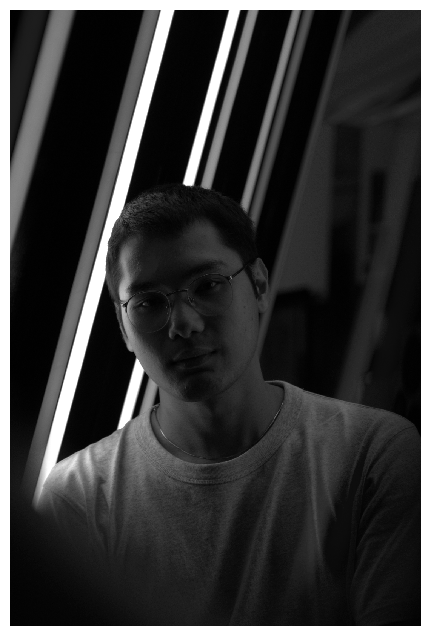

Global min = 0
Global max = 226


In [96]:
mp.figure(figsize=(6*2, 4*2))
mp.imshow(img, 'gray')
mp.axis('off')
mp.show()
print('Global min = {}'.format(img.min()))
print('Global max = {}'.format(img.max()))

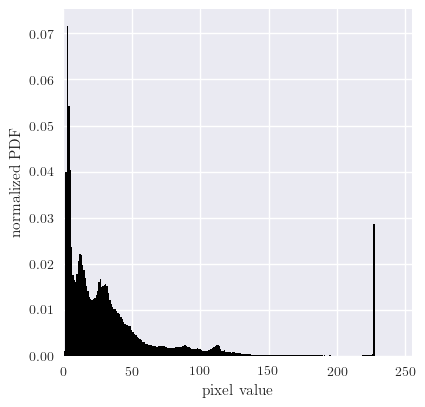

In [101]:
mp.figure(figsize=(9/2, 9/2))
hist = np.squeeze(cv.calcHist([img], [0], None, [256], [0, 255]))
hist /= img.size
mp.bar(range(256), hist, width=1.0, color='k')
mp.xlim(0, 255)
mp.xlabel('pixel value')
mp.ylabel('normalized PDF')
# mp.title('histogram of original')
# mp.savefig('orig_hist.png', dpi=300, bbox_inches='tight')
mp.show()

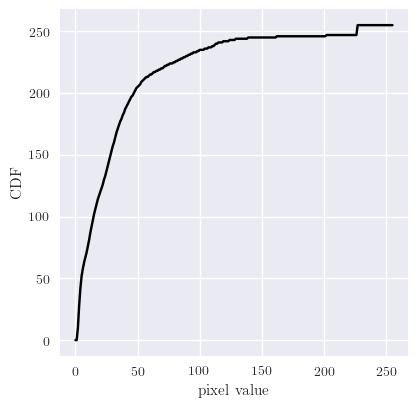

In [102]:
cdf = hist.cumsum()
cdf /= cdf[-1]
cdf *= 255
cdf = cdf.astype('uint8')

mp.figure(figsize=(9/2, 9/2))
mp.plot(range(256), cdf, 'k-')
mp.xlabel('pixel value')
mp.ylabel('CDF')
# mp.title('original CDF')
mp.savefig('orig_cdf.png', dpi=300, bbox_inches='tight')
mp.show()

In [98]:
def contrastStretch(img):
    return (img - img.min())/(img.max()-img.min())

In [83]:
imgp = contrastStretch(img) * 255
imgp = imgp.astype('uint8')
cv.imwrite('contrast_stretch.png', imgp)

True

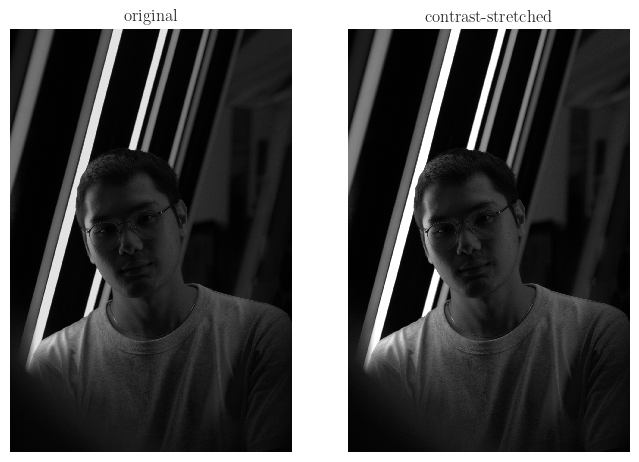

Global min = 0
Global max = 255


In [84]:
fig = mp.figure(figsize=(4*2, 6))

ax = fig.add_subplot(121)
ax.imshow(img, 'gray', vmin=0, vmax=255)
ax.axis('off')
ax.set_title('original')

ax = fig.add_subplot(122)
ax.imshow(imgp, 'gray', vmin=0, vmax=255)
ax.axis('off')
ax.set_title('contrast-stretched')

mp.show()
print('Global min = {}'.format(imgp.min()))
print('Global max = {}'.format(imgp.max()))

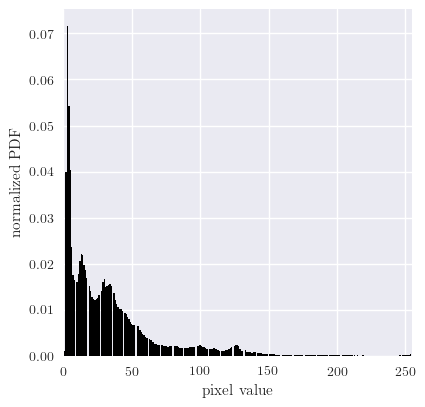

In [99]:
mp.figure(figsize=(9/2, 9/2))
hist = np.squeeze(cv.calcHist([imgp], [0], None, [256], [0, 255]))
hist /= imgp.size
mp.bar(range(256), hist, width=1.0, color='k')
mp.xlim(0, 255)
mp.xlabel('pixel value')
mp.ylabel('normalized PDF')
# mp.title('histogram of contrast-stretched')
mp.savefig('cs_hist.png', dpi=300, bbox_inches='tight')
mp.show()

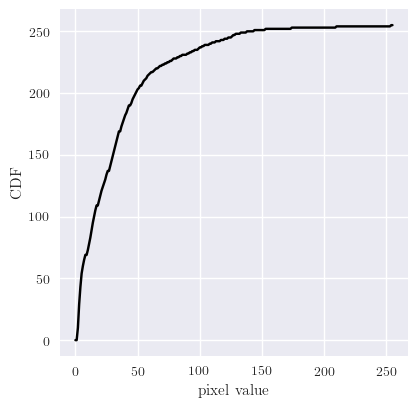

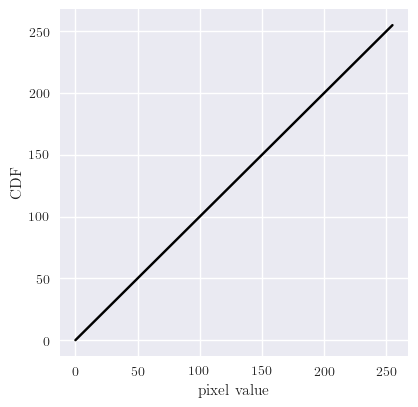

In [100]:
cdf = hist.cumsum()
cdf /= cdf[-1]
cdf *= 255
cdf = cdf.astype('uint8')
x = np.arange(256)
y = x.copy()

mp.figure(figsize=(9/2, 9/2))
mp.plot(range(256), cdf, 'k-')
mp.xlabel('pixel value')
mp.ylabel('CDF')
# mp.title('original CDF')
mp.savefig('cs_cdf.png', dpi=300, bbox_inches='tight')
mp.show()

mp.figure(figsize=(9/2, 9/2))
mp.plot(x, y, 'k-')
mp.xlabel('pixel value')
mp.ylabel('CDF')
# mp.title('desired CDF')
mp.savefig('uniform_cdf.png', dpi=300, bbox_inches='tight')
mp.show()

In [87]:
img_bp = (exposure.equalize_hist(img) * 255).astype('uint8')
cv.imwrite('hist_equal.png', img_bp)

True

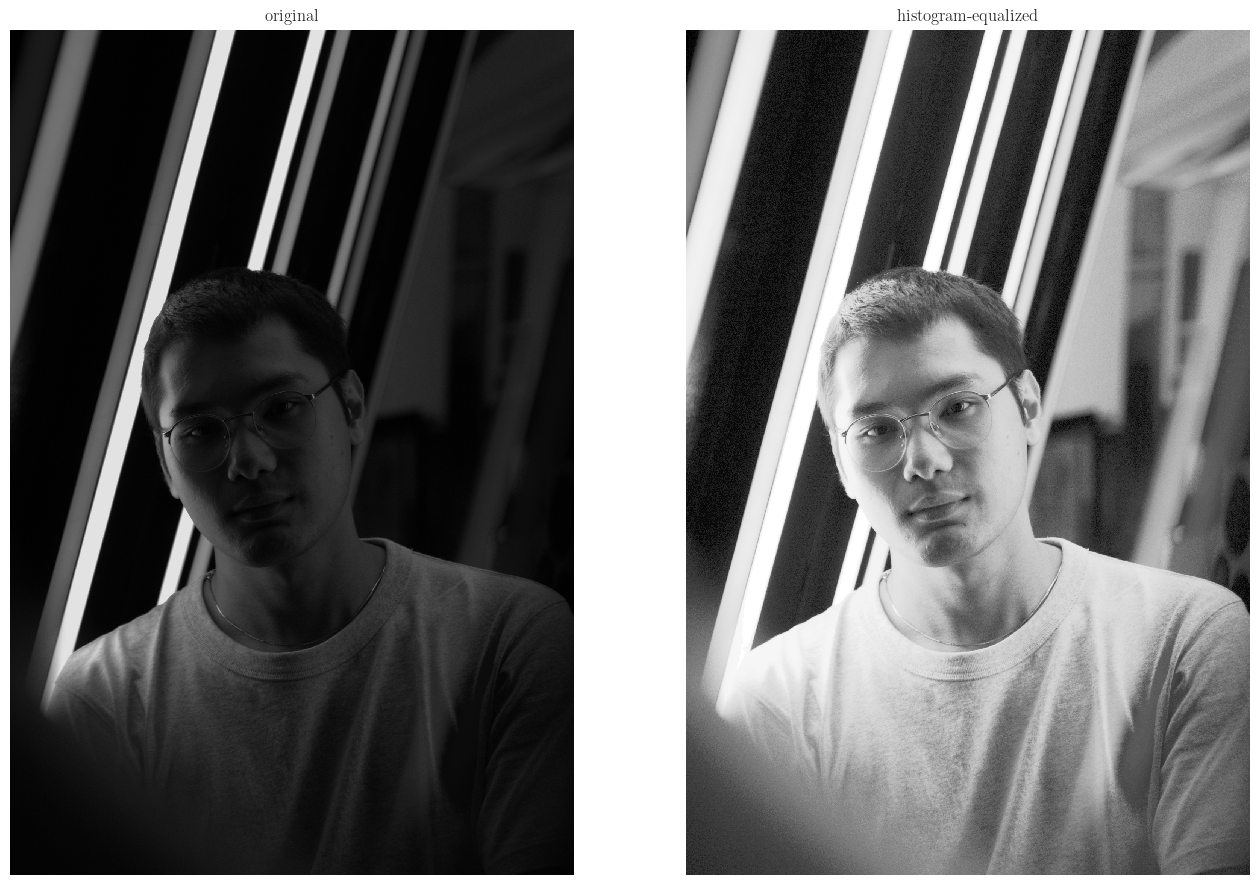

Global min = 0
Global max = 255


In [88]:
fig = mp.figure(figsize=(4*2*2, 6*2))

ax = fig.add_subplot(121)
ax.imshow(img, 'gray', vmin=0, vmax=255)
ax.axis('off')
ax.set_title('original')

ax = fig.add_subplot(122)
ax.imshow(img_bp, 'gray', vmin=0, vmax=255)
ax.axis('off')
ax.set_title('histogram-equalized')

mp.show()
print('Global min = {}'.format(img_bp.min()))
print('Global max = {}'.format(img_bp.max()))

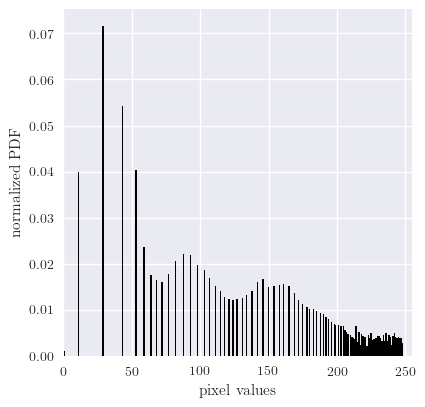

In [89]:
mp.figure(figsize=(9/2, 9/2))
hist_bp = np.squeeze(cv.calcHist([img_bp], [0], None, [256], [0, 255]))
hist_bp /= img_bp.size
mp.bar(range(256), hist_bp, width=1.0, color='k')
mp.xlim(0, 255)
mp.xlabel('pixel values')
mp.ylabel('normalized PDF')
# mp.title('histogram of equalized')
mp.savefig('histeq_hist.png', dpi=300, bbox_inches='tight')
mp.show()

In [90]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

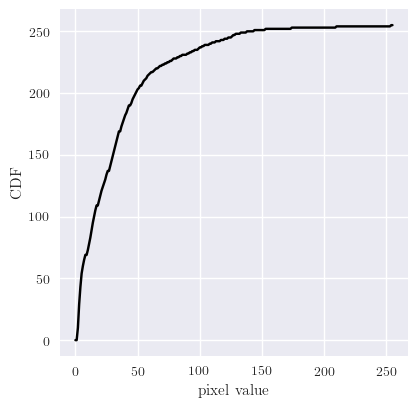

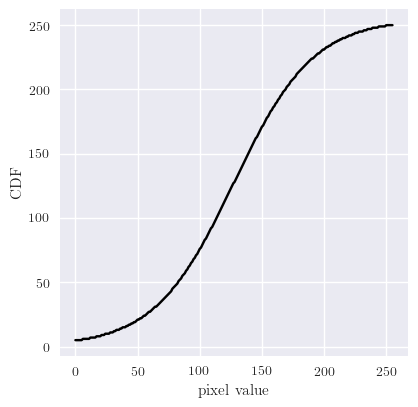

In [91]:
t = np.linspace(-4, 4, 256)
sig = sigmoid(t)

t += abs(t.min())
t /= t.max()
t *= 255
t = np.round(t).astype('uint8')
sig *= 255
sig = np.round(sig).astype('uint8')

cdf = hist.cumsum()
cdf /= cdf[-1]
cdf *= 255
cdf = cdf.astype('uint8')
x = np.arange(256)
y = x.copy()

mp.figure(figsize=(9/2, 9/2))
mp.plot(range(256), cdf, 'k-')
mp.xlabel('pixel value')
mp.ylabel('CDF')
# mp.title('original CDF')
# mp.savefig('orig_cdf.png', dpi=300, bbox_inches='tight')
mp.show()

mp.figure(figsize=(9/2, 9/2))
mp.plot(t, sig, 'k-')
mp.xlabel('pixel value')
mp.ylabel('CDF')
# mp.title('desired CDF')
mp.savefig('sigmoid_cdf.png', dpi=300, bbox_inches='tight')
mp.show()

In [92]:
img_sig = (t[sig[cdf[img]]]).astype('uint8')
cv.imwrite('adapt_eq.png', img_sig)

True

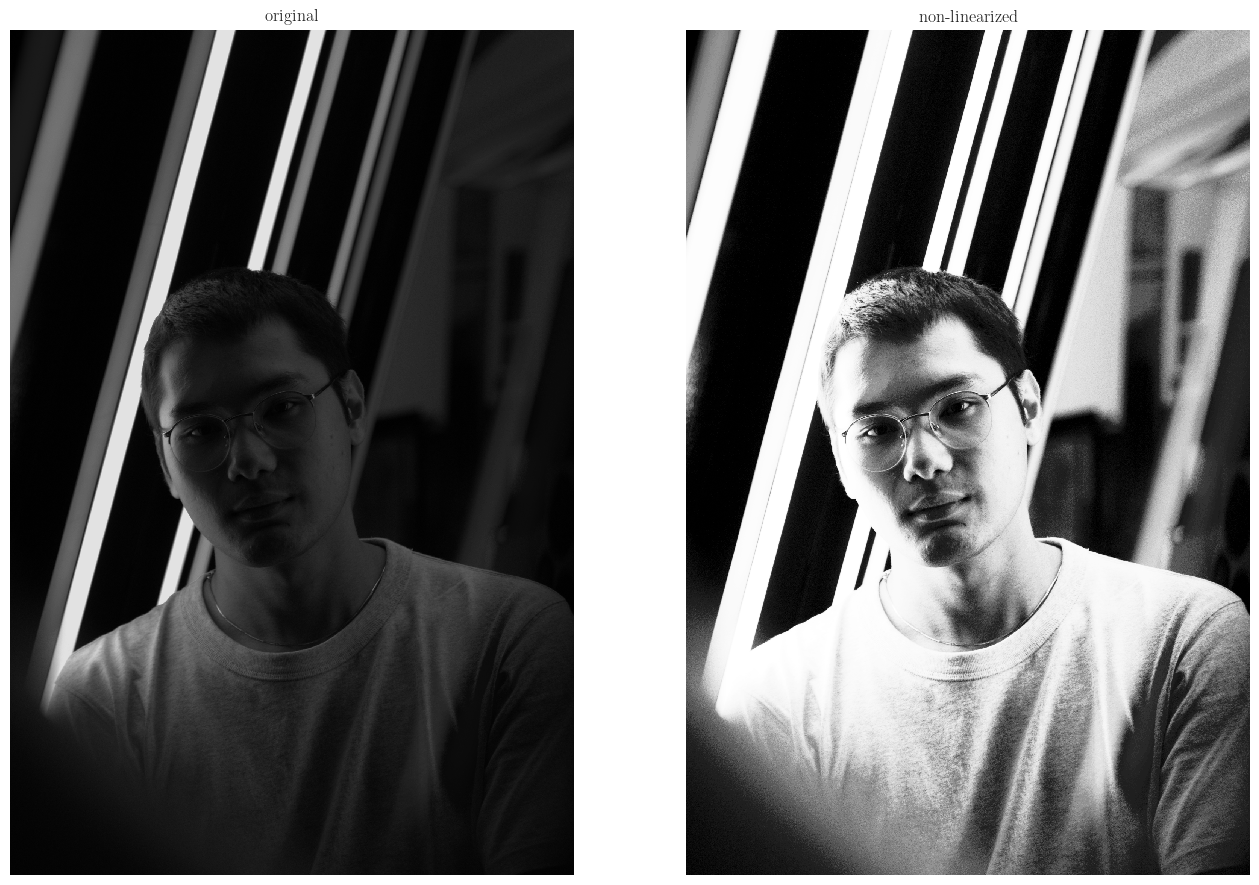

Global min = 5
Global max = 250


In [93]:
fig = mp.figure(figsize=(4*2*2, 6*2))

ax = fig.add_subplot(121)
ax.imshow(img, 'gray', vmin=0, vmax=255)
ax.axis('off')
ax.set_title('original')

ax = fig.add_subplot(122)
ax.imshow(img_sig, 'gray')
ax.axis('off')
ax.set_title('non-linearized')

mp.show()
print('Global min = {}'.format(img_sig.min()))
print('Global max = {}'.format(img_sig.max()))

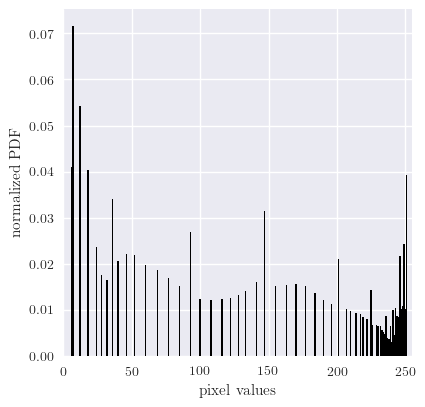

In [94]:
mp.figure(figsize=(9/2, 9/2))
hist_sig = np.squeeze(cv.calcHist([img_sig], [0], None, [256], [0, 255]))
hist_sig /= img_sig.size
mp.bar(range(256), hist_sig, width=1.0, color='k')
mp.xlim(0, 255)
mp.xlabel('pixel values')
mp.ylabel('normalized PDF')
# mp.title('histogram of equalized')
mp.savefig('adapteq_hist.png', dpi=300, bbox_inches='tight')
mp.show()

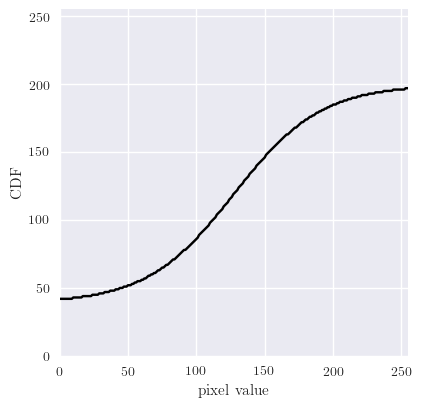

In [144]:
t = np.linspace(-4, 4, 256)
sig = sigmoid(t)

t += abs(t.min())
t /= t.max()
t *= 255
t = np.round(t).astype('uint8')
sig += 0.24
sig *= 161
sig = np.round(sig).astype('uint8')

mp.figure(figsize=(9/2, 9/2))
mp.plot(t, sig, 'k-')
mp.xlabel('pixel value')
mp.ylabel('CDF')
mp.xlim(0, 255)
mp.ylim(0, 255)
# mp.title('desired CDF')
mp.savefig('crush_cdf.png', dpi=300, bbox_inches='tight')
mp.show()

In [129]:
img_crush = (t[sig[cdf[img]]]).astype('uint8')
cv.imwrite('crushed.png', img_crush)

True

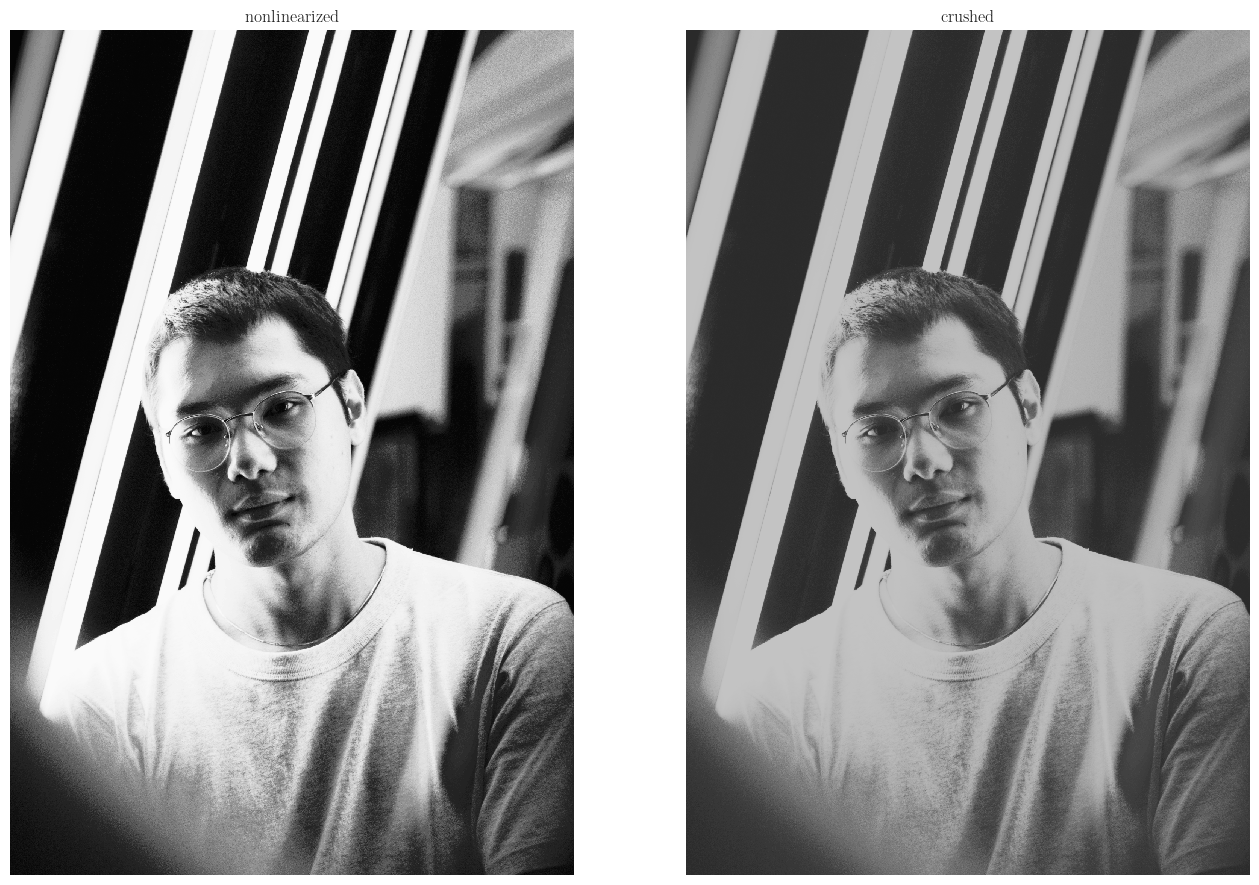

Global min = 5
Global max = 250


In [128]:
fig = mp.figure(figsize=(4*2*2, 6*2))

ax = fig.add_subplot(121)
ax.imshow(img_sig, 'gray', vmin=0, vmax=255)
ax.axis('off')
ax.set_title('nonlinearized')

ax = fig.add_subplot(122)
ax.imshow(img_crush, 'gray', vmin=0, vmax=255)
ax.axis('off')
ax.set_title('crushed')

mp.show()
print('Global min = {}'.format(img_sig.min()))
print('Global max = {}'.format(img_sig.max()))

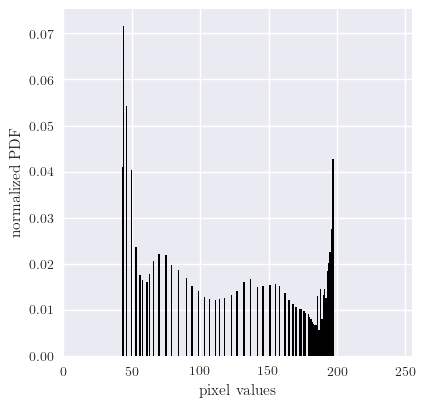

In [132]:
mp.figure(figsize=(9/2, 9/2))
hist_crush = np.squeeze(cv.calcHist([img_crush], [0], None, [256], [0, 255]))
hist_crush /= img_crush.size
mp.bar(range(256), hist_crush, width=1.0, color='k')
mp.xlim(0, 255)
mp.xlabel('pixel values')
mp.ylabel('normalized PDF')
# mp.title('histogram of equalized')
mp.savefig('crush_hist.png', dpi=300, bbox_inches='tight')
mp.show()